# EvoAgentX Workflow Jobs Tutorial

## Overview

This tutorial demonstrates how to use EvoAgentX to create an intelligent job search and application workflow. The system analyzes a PDF resume and automatically finds relevant job opportunities, then assists with filling out job applications using AI agents.

## What This Example Does

The `workflow_jobs.py` example showcases:

1. **Resume Analysis**: Reads and analyzes a PDF resume to understand the candidate's skills and experience
2. **Job Search**: Uses web search tools to find relevant job opportunities based on the resume
3. **Automated Application**: Navigates to job websites and fills out application forms (without submitting)
4. **Comprehensive Reporting**: Generates a detailed markdown report with job recommendations and application details

## Prerequisites

### Environment Setup

1. **Python 3.10+** installed on your system
2. **EvoAgentX** package installed
3. **API Keys** for the following services:
   - OpenAI API key
   - Anthropic API key (optional)
   - Hirebase API key (for job search functionality)

### Environment Variables

Create a `.env` file in your project root with the following variables:

```env
OPENAI_API_KEY=your_openai_api_key_here
```

## File Structure

```
examples/
├── workflow_jobs.ipynb              # Main workflow script
├── goal_maker.py              # Main workflow script
└── output/
    └── jobs/
        ├── test_pdf.pdf         # Sample resume PDF
        ├── mcp_jobs.config      # MCP tool configuration
        ├── jobs_demo_4o_mini.json  # Saved workflow graph
        └── output.md            # Generated job report
```

## Configuration Files

### MCP Configuration (`mcp_jobs.config`)

This file configures the Model Context Protocol (MCP) tools used for job searching:

```json
{
    "mcpServers": {
        "hirebase (Hiring information requesting service, must provide search keywords)": {
            "command": "uvx",
            "args": ["hirebase-mcp"],
            "env": {
                "HIREBASE_API_KEY": ""
            }
        }
    }
}
```

Hirebase API key is optional


### Prepare for Running
Install this package

In [ ]:
!pip install git+https://github.com/EvoAgentX/EvoAgentX.git

### 1. Imports and Setup

In [1]:
import os 
import sys
from dotenv import load_dotenv 
from pathlib import Path
import nest_asyncio
# Add project root to Python path
project_root = str(Path().absolute().parent)
sys.path.append(project_root)

from evoagentx.models import OpenAILLMConfig, OpenAILLM
from evoagentx.workflow import WorkFlowGraph, WorkFlow
from evoagentx.agents import AgentManager
from evoagentx.workflow import WorkFlowGenerator
from evoagentx.tools.mcp import MCPToolkit
from evoagentx.tools.file_tool import FileTool
from examples.goal_maker import making_goal

nest_asyncio.apply()
load_dotenv() # Loads environment variables from .env file
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

/home/junhual1/miniconda3/envs/evo/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configuration settings
output_file = project_root +"/examples/output/jobs/output.md"
mcp_config_path = project_root +"/examples/output/jobs/mcp_jobs.config"
target_directory = project_root +"/examples/output/jobs/"
module_save_path = project_root +"/examples/output/jobs/jobs_demo_4o_jpt_mini.json"
pdf_path = project_root +"/examples/output/jobs/test_pdf.pdf"


### 2. LLM Configuration

In [3]:

# LLM configuration
openai_config = OpenAILLMConfig(
    model="gpt-4o-mini", 
    openai_key=OPENAI_API_KEY, 
    stream=True, 
    output_response=True, 
    max_tokens=16000
)
# Initialize the language model
llm = OpenAILLM(config=openai_config)

# Define goal
goal = f"""Read and analyze the pdf resume at {pdf_path}, 
then find 5 real job opportunities to this client by search the website."""
## Generate more detailed goal with LLM
goal = making_goal(openai_config, goal)





goal: "The input for the workflow is to read and analyze the PDF resume located at /home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf. After extracting the relevant skills, experience, and qualifications from the resume, the workflow should utilize appropriate job search tools to find 5 real job opportunities that match the client's profile. Ensure to include comprehensive details for each job opportunity such as job title, company name, location, job description, job requirements, salary, and job posting link. The output should be formatted in markdown text, summarizing the analysis of the resume at the beginning, and the only initial input for the workflow is the "goal," with no other inputs. Remember to exclusively retrieve real job listings and utilize tool calling actions as much as possible."


2025-05-25 13:59:57.418 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.000 | Total tokens: 516 | Current cost: $0.000 | Current tokens: 516


### 3. Tool Setup

The workflow uses three types of tools:

- **MCP Tools**: For job search functionality via Hirebase
- **Browser Tools**: For web navigation and form filling


In [4]:
# Get tools
mcp_toolkit = MCPToolkit(config_path=mcp_config_path)
tools = mcp_toolkit.get_tools()
tools.append(FileTool())

2025-05-25 13:59:57.425 | INFO     | evoagentx.tools.mcp:_from_config:288 - Configured MCP server: hirebase (Hiring information requesting service, must provide search keywords) with command: uvx


Running event loop


2025-05-25 13:59:57.851 | INFO     | evoagentx.tools.mcp:__init__:247 - Successfully connected to MCP servers
2025-05-25 13:59:57.852 | INFO     | evoagentx.tools.mcp:get_tools:303 - Added 2 tools from MCP server


### 4. Workflow Generation &. Execution

The code showcase two functionalities:

#### Workflow Generation

In [5]:
# Workflow Creation
wf_generator = WorkFlowGenerator(llm=llm, tools=tools)
workflow_graph: WorkFlowGraph = wf_generator.generate_workflow(goal=goal)
# Save workflow 
workflow_graph.save_module(module_save_path)

2025-05-25 13:59:57.859 | INFO     | evoagentx.workflow.workflow_generator:generate_workflow:80 - Generating a workflow for: goal: "The input for the workflow is to read and analyze the PDF resume located at /home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf. After extracting the relevant skills, experience, and qualifications from the resume, the workflow should utilize appropriate job search tools to find 5 real job opportunities that match the client's profile. Ensure to include comprehensive details for each job opportunity such as job title, company name, location, job description, job requirements, salary, and job posting link. The output should be formatted in markdown text, summarizing the analysis of the resume at the beginning, and the only initial input for the workflow is the "goal," with no other inputs. Remember to exclusively retrieve real job listings and utilize tool calling actions as much as possible." ...


## Thought 
In order to fulfill the user's goal of analyzing a PDF resume and finding job opportunities, I’ve broken down the task into clear, actionable sub-tasks. The first step involves extracting information from the PDF file, which is crucial for understanding the client's profile. Next, job search tasks will be executed based on the extracted qualifications and skills. Each sub-task has been designed to maintain modularity and simplicity while ensuring that the outputs seamlessly flow into the subsequent steps. 

## Goal
The input for the workflow is to read and analyze the PDF resume located at `/home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf`. After extracting relevant skills, experience, and qualifications, the workflow should use job search tools to find 5 real job opportunities that match the client's profile, providing comprehensive details for each job listing formatted in markdown text.

## Plan
```json
{
    "sub_tasks": [
        {
            "name"

2025-05-25 14:00:13.789 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.001 | Total tokens: 3331 | Current cost: $0.001 | Current tokens: 2815
2025-05-25 14:00:13.797 | INFO     | evoagentx.workflow.workflow_generator:generate_workflow:83 - Successfully generate the following workflow:
Task Name: resume_analysis
Description: Extract relevant skills, experience, and qualifications from the specified PDF resume.
Inputs:
  - goal (string, required): The user's goal in textual format.
Outputs:
  - extracted_info (object, required): An object containing extracted skills, experience, and qualifications from the resume.

Task Name: job_search
Description: Utilize job search tools to find 5 real job opportunities that match the client's profile based on the extracted information.
Inputs:
  - goal (string, required): The user's goal in textual format.
  - extracted_info (object, required): The extracted skills, experience, and qualifications that will be used to find j


## Thought 
The selected agent for the sub-task is designed to read and extract information from the PDF resume mentioned in the goal. This aligns with the objectives of extracting relevant skills, experience, and qualifications essential for the subsequent job search process. Given that no predefined agents were provided that explicitly handle PDF extraction, I have generated a new agent specifically for this purpose. This agent will utilize the "read_file" tool from the tools section to read content from the PDF resume and extract the necessary information to produce the required output.

## Objective
The objective of the "resume_analysis" sub-task is to extract relevant skills, experience, and qualifications from a specified PDF resume based on the user's goal. The output must be an object containing the extracted information, which will serve as an input for the following job search task.

## Selected or Generated Agents
```json
{
    "selected_agents": [],
    "generated_agents":

2025-05-25 14:00:24.346 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.002 | Total tokens: 7026 | Current cost: $0.001 | Current tokens: 3695
2025-05-25 14:00:24.350 | INFO     | evoagentx.workflow.workflow_generator:generate_agents:120 - Generating agents for subtask: job_search



Generated agents: {
    "selected_agents": [],
    "generated_agents": [
        {
            "name": "resume_extraction_agent",
            "description": "This agent reads the specified PDF resume and extracts relevant skills, experience, and qualifications to create an object representation of the candidate's profile.",
            "inputs": [
                {
                    "name": "goal",
                    "type": "string",
                    "description": "The user's goal in textual format, containing the path to the resume to be analyzed.",
                    "required": true
                }
            ],
            "outputs": [
                {
                    "name": "extracted_info",
                    "type": "object",
                    "description": "An object containing extracted skills, experience, and qualifications from the resume.",
                    "required": true
                }
            ],
            "prompt": "### Objective\nExtr

2025-05-25 14:00:34.846 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.003 | Total tokens: 10850 | Current cost: $0.001 | Current tokens: 3824
2025-05-25 14:00:34.849 | INFO     | evoagentx.workflow.workflow_generator:generate_agents:120 - Generating agents for subtask: format_output



Generated agents: {
    "selected_agents": [],
    "generated_agents": [
        {
            "name": "job_search_agent",
            "description": "This agent searches for job opportunities based on the client's qualifications extracted from their resume.",
            "inputs": [
                {
                    "name": "goal",
                    "type": "string",
                    "description": "The user's goal in textual format.",
                    "required": true
                },
                {
                    "name": "extracted_info",
                    "type": "object",
                    "description": "The extracted skills, experience, and qualifications that will be used to find job matches.",
                    "required": true
                }
            ],
            "outputs": [
                {
                    "name": "job_opportunities",
                    "type": "array",
                    "description": "An array of job objects, e

2025-05-25 14:00:50.313 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.003 | Total tokens: 14775 | Current cost: $0.001 | Current tokens: 3925
2025-05-25 14:00:50.317 | INFO     | evoagentx.core.module:save_module:436 - Saving WorkFlowGraph to /home/junhual1/projects/EvoAgentX/examples/output/jobs/jobs_demo_4o_jpt_mini.json



Generated agents: {
    "selected_agents": [],
    "generated_agents": [
        {
            "name": "markdown_formatting_agent",
            "description": "This agent formats the extracted resume information and job opportunities into markdown text, ensuring clarity and structure for the user.",
            "inputs": [
                {
                    "name": "goal",
                    "type": "string",
                    "description": "The user's goal in textual format.",
                    "required": true
                },
                {
                    "name": "extracted_info",
                    "type": "object",
                    "description": "The extracted skills, experience, and qualifications from the resume.",
                    "required": true
                },
                {
                    "name": "job_opportunities",
                    "type": "array",
                    "description": "The array of job opportunities found that match

'/home/junhual1/projects/EvoAgentX/examples/output/jobs/jobs_demo_4o_jpt_mini.json'

#### Visualization

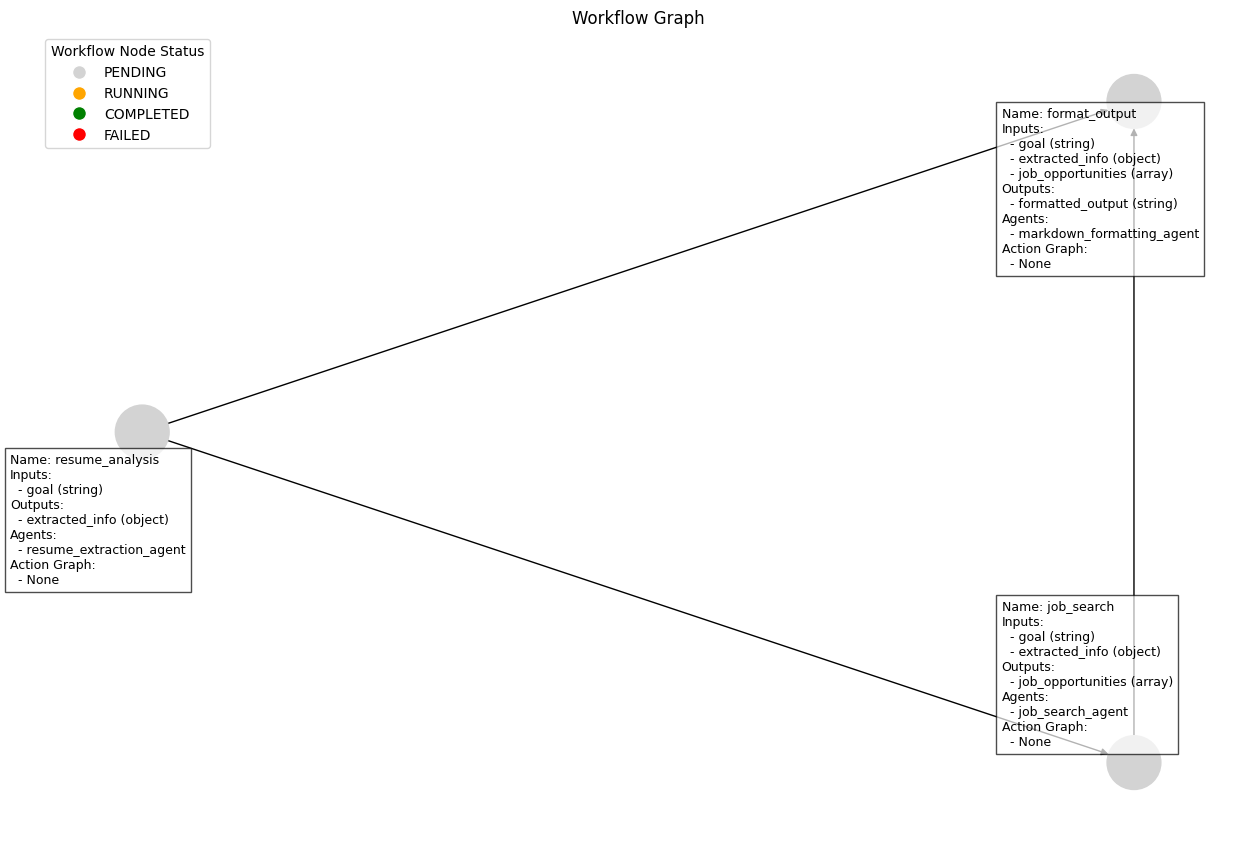

In [6]:
# Display workflow
workflow_graph.display()

#### Workflow Execution

In [7]:
# Load saved workflow 
workflow_graph: WorkFlowGraph = WorkFlowGraph.from_file(module_save_path)

# Set up agent manager
agent_manager = AgentManager(tools=tools)
agent_manager.add_agents_from_workflow(workflow_graph, llm_config=openai_config)

# Initialize and execute workflow
workflow = WorkFlow(graph=workflow_graph, agent_manager=agent_manager, llm=llm)
workflow.init_module()
output = workflow.execute()

2025-05-25 14:00:50.998 | INFO     | evoagentx.workflow.workflow:get_next_task:121 - Task Execution Trajectory: None. Scheduling next subtask ...
2025-05-25 14:00:50.999 | INFO     | evoagentx.workflow.workflow:get_next_task:123 - The next subtask to be executed is: resume_analysis
2025-05-25 14:00:51.000 | INFO     | evoagentx.workflow.workflow:async_execute:83 - Executing subtask: resume_analysis


Next action: Based on the tasks' execution results, the next action to be executed is the 'ResumeExtractionAgentAction' action of 'resume_extraction_agent' agent.
_______________________ Start Tool Calling _______________________
## Thought
To achieve the objective of extracting relevant skills, experience, and qualifications from the specified PDF resume, I first need to read the PDF file located at the given path. I'll use the `read_file` tool to extract the content of the resume, and then I can proceed to analyze that content to extract the desired information.

## extracted_info
```ToolCalling
[{
    "function_name": "read_file",
    "function_args": {
        "file_path": "/home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf"
    }
}]
```

2025-05-25 14:00:56.789 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.004 | Total tokens: 16092 | Current cost: $0.000 | Current tokens: 1317



Tool call args:
## Thought
To achieve the objective of extracting relevant skills, experience, and qualifications from the specified PDF resume, I first need to read the PDF file located at the given path. I'll use the `read_file` tool to extract the content of the resume, and then I can proceed to analyze that content to extract the desired information.

## extracted_info
```ToolCalling
[{
    "function_name": "read_file",
    "function_args": {
        "file_path": "/home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf"
    }
}]
```
Extracted tool call args:
[{'function_name': 'read_file', 'function_args': {'file_path': '/home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf'}}]
_____________________ Start Function Calling _____________________
Executing function calling: read_file with {'file_path': '/home/junhual1/projects/EvoAgentX/examples/output/jobs/test_pdf.pdf'}
results:
{'result': [{'success': True, 'content': ' \n    \n   Wei Zhang \nEmail: zhang

2025-05-25 14:01:15.078 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.004 | Total tokens: 18889 | Current cost: $0.001 | Current tokens: 2797



Tool call args:
## Thought
To fulfill the goal, I will extract relevant skills, experience, and qualifications from the provided PDF resume. The content has already been read successfully, so I'll analyze it to structure the extracted information into the required object format.

## extracted_info
{
  "name": "Wei Zhang",
  "email": "zhang.wei@email.com",
  "phone": "(555) 123-4567",
  "location": "Beijing, China",
  "education": [
    {
      "institution": "The University of Melbourne",
      "location": "Victoria, Australia",
      "degree": "Bachelor's",
      "field": "Computer Science",
      "duration": "Sept 2011 - June 2015",
      "achievements": ["Outstanding Graduate Award"]
    },
    {
      "institution": "The University of Melbourne",
      "location": "Victoria, Australia",
      "degree": "Master's",
      "field": "Computer Science",
      "duration": "Sept 2015 - June 2018",
      "thesis": "Distributed Deep Learning Systems for Real-time Image Recognition",
      

2025-05-25 14:01:36.205 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.005 | Total tokens: 20854 | Current cost: $0.001 | Current tokens: 1965
2025-05-25 14:01:36.212 | INFO     | evoagentx.workflow.workflow:get_next_task:121 - Task Execution Trajectory: resume_analysis. Scheduling next subtask ...
2025-05-25 14:01:36.213 | INFO     | evoagentx.workflow.workflow:get_next_task:123 - The next subtask to be executed is: job_search
2025-05-25 14:01:36.214 | INFO     | evoagentx.workflow.workflow:async_execute:83 - Executing subtask: job_search



Extracted output:
{
    "extracted_info": {
        "skills": {
            "programming_languages": [
                "Python",
                "Java",
                "JavaScript",
                "TypeScript",
                "Go",
                "C++"
            ],
            "frameworks_libraries": [
                "React",
                "Node.js",
                "Django",
                "Spring Boot",
                "TensorFlow",
                "PyTorch"
            ],
            "cloud_devops": [
                "AWS",
                "Docker",
                "Kubernetes",
                "CI/CD",
                "Terraform"
            ],
            "databases": [
                "PostgreSQL",
                "MongoDB",
                "Redis",
                "Elasticsearch"
            ],
            "tools": [
                "Git",
                "JIRA",
                "Docker",
                "Jenkins",
                "Prometheus",
                "Grafan

2025-05-25 14:01:41.931 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.006 | Total tokens: 23333 | Current cost: $0.000 | Current tokens: 2479
2025-05-25 14:01:41.932 | ERROR    | evoagentx.actions.tool_calling:_calling_tools:176 - Error executing tool: 'str' object has no attribute 'get'
2025-05-25 14:01:41.932 | ERROR    | evoagentx.actions.tool_calling:_calling_tools:176 - Error executing tool: 'str' object has no attribute 'get'



Tool call args:
## Thought
Based on the client's qualifications extracted from the resume, they have strong skills in software engineering, including expertise in programming languages (Python, Java, JavaScript, etc.), frameworks (React, Django, etc.), and cloud technologies (AWS, Docker, etc.). Additionally, they have relevant experience in the industry as a Senior Software Engineer and Software Engineer, along with advanced degrees in computer science. With these qualifications, I will search for job opportunities that match these skills and experiences to find suitable positions.

### Tool Call
```ToolCalling
{
    "function_name": "search_jobs",
    "function_args": {
        "query": "Software Engineer",
        "and_keywords": ["Python", "Java", "JavaScript", "AWS", "Docker", "CI/CD"],
        "or_keywords": ["React", "Django", "Spring Boot", "TensorFlow", "PyTorch"],
        "limit": 5
    }
}
```

## job_opportunities
[]
Extracted tool call args:
{'function_name': 'search_jobs

2025-05-25 14:01:46.620 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.006 | Total tokens: 25928 | Current cost: $0.000 | Current tokens: 2595
2025-05-25 14:01:46.621 | INFO     | evoagentx.tools.mcp:_sync_call_tool:211 - Calling MCP tool: search_jobs with arguments: {'query': 'Software Engineer', 'and_keywords': ['Python', 'Java', 'JavaScript', 'AWS', 'Docker', 'CI/CD'], 'or_keywords': ['React', 'Django', 'Spring Boot', 'TensorFlow', 'PyTorch'], 'limit': 5}



Tool call args:
## Thought
Based on the provided resume information, I noticed the user has a strong background in software engineering with expertise in programming languages, cloud technologies, and frameworks. I will search for job opportunities that match this profile, focusing on positions that require similar skills, such as Python, Java, and experience with cloud technologies like AWS and Docker.

I will initiate a search for software engineering roles that include required skills and frameworks that align with the user’s qualifications. This will help in providing relevant job opportunities.

```ToolCalling
[{
    "function_name": "search_jobs",
    "function_args": {
        "query": "Software Engineer",
        "and_keywords": ["Python", "Java", "JavaScript", "AWS", "Docker", "CI/CD"],
        "or_keywords": ["React", "Django", "Spring Boot", "TensorFlow", "PyTorch"],
        "limit": 5
    }
}]
```
## job_opportunities
[]
Extracted tool call args:
[{'function_name': 'search

2025-05-25 14:01:53.636 | INFO     | evoagentx.tools.mcp:_sync_call_tool:216 - MCP tool search_jobs call completed successfully


results:
{'result': [CallToolResult(meta=None, content=[TextContent(type='text', text='{\n  "_id": "68288867f1ea6222754da27b",\n  "company_name": "The Zebra",\n  "job_title": "Software Engineer II - Fullstack (Remote, United States)",\n  "description": "<p>The Zebra is seeking a Software Engineer II with strong backend experience to join their Top Gun squad. The team drives key initiatives across the user experience, from expanding insurance comparison tools to integrating with carrier partners and optimizing the customer journey. As a Software Engineer II, you\'ll be expected to write clean, scalable code, participate in architecture discussions, and take increasing ownership of features and systems over time.</p><h2>Requirements</h2><ul><li>3+ years of professional software development experience</li><li>Expertise in both backend and frontend development</li><li>Working proficiency in technologies such as: Frontend: Javascript, React, TypeScript, HTML/CSS, Backend: Python, Ruby, Java

2025-05-25 14:01:59.958 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.007 | Total tokens: 33080 | Current cost: $0.001 | Current tokens: 7152
2025-05-25 14:01:59.959 | INFO     | evoagentx.tools.mcp:_sync_call_tool:211 - Calling MCP tool: search_jobs with arguments: {'query': 'Software Engineer', 'and_keywords': ['Python', 'Java', 'JavaScript', 'AWS', 'Docker', 'CI/CD'], 'or_keywords': ['React', 'Django', 'Spring Boot', 'TensorFlow', 'PyTorch'], 'limit': 5}



Tool call args:
## Thought
Based on the goal and the extracted resume information, I am looking for job opportunities that align with the skills, experience, and qualifications of the client. The client has extensive experience in software engineering, particularly with programming languages like Python, Java, JavaScript, as well as expertise in frameworks, cloud technologies, and databases. Therefore, I will perform a job search focused on software engineering roles that require a mix of these technical skills and experience, aiming for positions that are well suited for a candidate with their background.

## job_opportunities
```ToolCalling
[{
    "function_name": "search_jobs",
    "function_args": {
        "query": "Software Engineer",
        "and_keywords": ["Python", "Java", "JavaScript", "AWS", "Docker", "CI/CD"],
        "or_keywords": ["React", "Django", "Spring Boot", "TensorFlow", "PyTorch"],
        "limit": 5
    }
}]
```
Extracted tool call args:
[{'function_name': 'se

2025-05-25 14:02:02.583 | INFO     | evoagentx.tools.mcp:_sync_call_tool:216 - MCP tool search_jobs call completed successfully


results:
{'result': [CallToolResult(meta=None, content=[TextContent(type='text', text='{\n  "_id": "68288867f1ea6222754da27b",\n  "company_name": "The Zebra",\n  "job_title": "Software Engineer II - Fullstack (Remote, United States)",\n  "description": "<p>The Zebra is seeking a Software Engineer II with strong backend experience to join their Top Gun squad. The team drives key initiatives across the user experience, from expanding insurance comparison tools to integrating with carrier partners and optimizing the customer journey. As a Software Engineer II, you\'ll be expected to write clean, scalable code, participate in architecture discussions, and take increasing ownership of features and systems over time.</p><h2>Requirements</h2><ul><li>3+ years of professional software development experience</li><li>Expertise in both backend and frontend development</li><li>Working proficiency in technologies such as: Frontend: Javascript, React, TypeScript, HTML/CSS, Backend: Python, Ruby, Java

2025-05-25 14:02:07.170 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.009 | Total tokens: 44764 | Current cost: $0.002 | Current tokens: 11684
2025-05-25 14:02:07.171 | INFO     | evoagentx.tools.mcp:_sync_call_tool:211 - Calling MCP tool: search_jobs with arguments: {'query': 'Software Engineer', 'and_keywords': ['Python', 'Java', 'JavaScript', 'AWS', 'Docker', 'CI/CD'], 'or_keywords': ['React', 'Django', 'Spring Boot', 'TensorFlow', 'PyTorch'], 'limit': 5}



Tool call args:
## Thought
Based on the goal, I need to find 5 real job opportunities that match the client's qualifications extracted from their resume. The extracted information includes a strong background in software engineering, proficiency in multiple programming languages, experience with cloud services and various frameworks, as well as relevant education and certifications. I will use the job search tool to specifically target roles related to software engineering, emphasizing the necessary skills and experience.

## job_opportunities
```ToolCalling
[{
    "function_name": "search_jobs",
    "function_args": {
        "query": "Software Engineer",
        "and_keywords": ["Python", "Java", "JavaScript", "AWS", "Docker", "CI/CD"],
        "or_keywords": ["React", "Django", "Spring Boot", "TensorFlow", "PyTorch"],
        "limit": 5
    }
}]
```
Extracted tool call args:
[{'function_name': 'search_jobs', 'function_args': {'query': 'Software Engineer', 'and_keywords': ['Python',

2025-05-25 14:02:09.581 | INFO     | evoagentx.tools.mcp:_sync_call_tool:216 - MCP tool search_jobs call completed successfully


results:
{'result': [CallToolResult(meta=None, content=[TextContent(type='text', text='{\n  "_id": "68288867f1ea6222754da27b",\n  "company_name": "The Zebra",\n  "job_title": "Software Engineer II - Fullstack (Remote, United States)",\n  "description": "<p>The Zebra is seeking a Software Engineer II with strong backend experience to join their Top Gun squad. The team drives key initiatives across the user experience, from expanding insurance comparison tools to integrating with carrier partners and optimizing the customer journey. As a Software Engineer II, you\'ll be expected to write clean, scalable code, participate in architecture discussions, and take increasing ownership of features and systems over time.</p><h2>Requirements</h2><ul><li>3+ years of professional software development experience</li><li>Expertise in both backend and frontend development</li><li>Working proficiency in technologies such as: Frontend: Javascript, React, TypeScript, HTML/CSS, Backend: Python, Ruby, Java

2025-05-25 14:02:15.090 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.012 | Total tokens: 61045 | Current cost: $0.003 | Current tokens: 16281
2025-05-25 14:02:15.091 | INFO     | evoagentx.tools.mcp:_sync_call_tool:211 - Calling MCP tool: search_jobs with arguments: {'query': 'Software Engineer', 'and_keywords': ['Python', 'Java', 'JavaScript', 'AWS', 'Docker', 'CI/CD'], 'or_keywords': ['React', 'Django', 'Spring Boot', 'TensorFlow', 'PyTorch'], 'limit': 5}



Tool call args:
## Thought
Based on the extracted qualifications from the client's resume, it is clear that they have extensive experience in software engineering, particularly in backend and full-stack development using languages such as Python, Java, and JavaScript. Additionally, they possess skills in cloud technologies (AWS), containerization (Docker), and frameworks like React and Spring Boot, which are highly sought after in the current job market. Given this information, I will utilize the `search_jobs` tool to find job opportunities that match these skills and experiences specifically related to software engineering roles.

## job_opportunities
```ToolCalling
[{
  "function_name": "search_jobs",
  "function_args": {
    "query": "Software Engineer",
    "and_keywords": [
      "Python",
      "Java",
      "JavaScript",
      "AWS",
      "Docker",
      "CI/CD"
    ],
    "or_keywords": [
      "React",
      "Django",
      "Spring Boot",
      "TensorFlow",
      "PyTorch"


2025-05-25 14:02:18.266 | INFO     | evoagentx.tools.mcp:_sync_call_tool:216 - MCP tool search_jobs call completed successfully


results:
{'result': [CallToolResult(meta=None, content=[TextContent(type='text', text='{\n  "_id": "68288867f1ea6222754da27b",\n  "company_name": "The Zebra",\n  "job_title": "Software Engineer II - Fullstack (Remote, United States)",\n  "description": "<p>The Zebra is seeking a Software Engineer II with strong backend experience to join their Top Gun squad. The team drives key initiatives across the user experience, from expanding insurance comparison tools to integrating with carrier partners and optimizing the customer journey. As a Software Engineer II, you\'ll be expected to write clean, scalable code, participate in architecture discussions, and take increasing ownership of features and systems over time.</p><h2>Requirements</h2><ul><li>3+ years of professional software development experience</li><li>Expertise in both backend and frontend development</li><li>Working proficiency in technologies such as: Frontend: Javascript, React, TypeScript, HTML/CSS, Backend: Python, Ruby, Java

2025-05-25 14:02:45.964 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.015 | Total tokens: 82728 | Current cost: $0.004 | Current tokens: 21683



Tool call args:
## Thought
The user's goal is to find job opportunities that align with the qualifications outlined in the provided resume. Based on the extracted information, the candidate has strong skills in software development, including various programming languages (Python, Java, JavaScript, etc.), expertise in frameworks, cloud technologies, and strong experience in both backend and frontend development. The candidate holds relevant educational qualifications and certifications, making them suitable for a variety of software engineering roles. I will use this information to search for job opportunities that match these qualifications.

## job_opportunities
```json
[
    {
        "job_title": "Software Engineer II - Fullstack",
        "company_name": "The Zebra",
        "location": "Remote, United States",
        "job_description": "The Zebra is seeking a Software Engineer II with strong backend experience to join their Top Gun squad. As a Software Engineer II, you will be 

2025-05-25 14:04:01.323 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.019 | Total tokens: 102467 | Current cost: $0.003 | Current tokens: 19739
2025-05-25 14:04:01.329 | INFO     | evoagentx.workflow.workflow:get_next_task:121 - Task Execution Trajectory: resume_analysis -> job_search. Scheduling next subtask ...
2025-05-25 14:04:01.330 | INFO     | evoagentx.workflow.workflow:get_next_task:123 - The next subtask to be executed is: format_output
2025-05-25 14:04:01.330 | INFO     | evoagentx.workflow.workflow:async_execute:83 - Executing subtask: format_output



Extracted output:
{
    "job_opportunities": [
        {
            "job_title": "Software Engineer II - Fullstack",
            "company_name": "The Zebra",
            "location": "Remote, United States",
            "job_description": "The Zebra is seeking a Software Engineer II with strong backend experience to join their Top Gun squad, focusing on expanding insurance comparison tools and optimizing the customer journey.",
            "job_requirements": "3+ years of professional software development experience, expertise in backend and frontend development, working proficiency in technologies such as JavaScript, React, TypeScript, HTML/CSS, Python, Ruby, databases like PostgreSQL, MySQL, or MongoDB, and experience with AWS, GCP, Docker, and CI/CD pipelines.",
            "salary": "$121,000 - $141,000 USD per year",
            "job_posting_link": "https://jobs.ashbyhq.com/The%20Zebra/9912e93c-93cf-4df4-8a5b-bb634eb54361"
        },
        {
            "job_title": "Senior Sof

2025-05-25 14:04:31.769 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.020 | Total tokens: 105901 | Current cost: $0.001 | Current tokens: 3434
2025-05-25 14:04:31.771 | INFO     | evoagentx.workflow.workflow:async_execute:98 - Extracting WorkFlow Output ...



```markdown
# Resume Analysis and Job Opportunities

This document provides a summary of the extracted skills, experience, and qualifications from the resume of a software professional, followed by relevant job opportunities that align with the provided profile.

## Extracted Skills, Experience, and Qualifications

### Skills
- **Programming Languages**: Python, Java, JavaScript, TypeScript, Go, C++
- **Frameworks/Libraries**: React, Node.js, Django, Spring Boot, TensorFlow, PyTorch
- **Cloud & DevOps**: AWS, Docker, Kubernetes, CI/CD, Terraform
- **Databases**: PostgreSQL, MongoDB, Redis, Elasticsearch
- **Tools**: Git, JIRA, Jenkins, Prometheus, Grafana

### Experience

1. **Senior Software Engineer**
   - **Company**: ByteDance
   - **Location**: Beijing, China
   - **Duration**: July 2020 - Present
   - **Responsibilities**:
     - Led a team to develop a recommendation system enhancing user engagement by 28%.
     - Architected a data processing pipeline managing over 10TB daily 

2025-05-25 14:04:54.225 | INFO     | evoagentx.models.model_utils:update_cost:65 - Total cost: $0.021 | Total tokens: 111641 | Current cost: $0.001 | Current tokens: 5740


#### Save Results

In [8]:
# Save results to file
try:
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(output)
    print(f"Job recommendations have been saved to {output_file}")
except Exception as e:
    print(f"Error saving job recommendations: {e}")

# Display output
print(output)

Job recommendations have been saved to /home/junhual1/projects/EvoAgentX/examples/output/jobs/output.md
```markdown
# Resume Analysis and Job Opportunities

This document provides a summary of the extracted skills, experience, and qualifications from the resume of a software professional, followed by relevant job opportunities that align with the provided profile.

## Extracted Skills, Experience, and Qualifications

### Skills
- **Programming Languages**: Python, Java, JavaScript, TypeScript, Go, C++
- **Frameworks/Libraries**: React, Node.js, Django, Spring Boot, TensorFlow, PyTorch
- **Cloud & DevOps**: AWS, Docker, Kubernetes, CI/CD, Terraform
- **Databases**: PostgreSQL, MongoDB, Redis, Elasticsearch
- **Tools**: Git, JIRA, Jenkins, Prometheus, Grafana

### Experience

1. **Senior Software Engineer**
   - **Company**: ByteDance
   - **Location**: Beijing, China
   - **Duration**: July 2020 - Present
   - **Responsibilities**:
     - Led a team to develop a recommendation system en